In [1]:
# 9.1 확률분포의 추정

In [2]:
# 확률분포의 결정

In [3]:
# 연습문제 9.1.1
from sklearn.datasets import load_boston
boston = load_boston()
dfx = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfx, dfy], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# 모수추정 방법론

In [5]:
# 모멘트 방법

In [6]:
# 연습문제 9.1.2

In [7]:
# 9.2 최대가능도 추정법

In [8]:
# 가능도 함수

In [9]:
# 복수의 표본데이터가 있는 경우의 가능도함수

In [10]:
# 로그가능도 함수

In [11]:
# 연습문제 9.2.1

In [12]:
# 연습문제 9.2.2

In [13]:
# 베르누이분포의 최대가능도 모수추정

In [14]:
# 카테고리분포의 최대가능도 모수추정

In [15]:
# 정규분포의 최대가능도 모수추정

In [16]:
# 다변수정규분포의 최대가능도 모수추정

In [17]:
# 9.3 베이즈 추정법

In [18]:
# 베이즈 추정법의 기본 정리

In [19]:
# 베르누이분포의 모수추정

In [20]:
# 연습문제 9.3.1
def bernuii(a, b):

    xx = np.linspace(0, 1, 1000)
    a0, b0 = 1, 1
    a1, b1 = a + a0, b + b0
    plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), c='r', ls='--', label='사전분포')
    plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), c='g', ls='-', label='사후분포')
    plt.legend()
    plt.title(f'베이즈 추정법으로 계산한 베르누이분포 모수의 분포{a}{b}')
    plt.show()

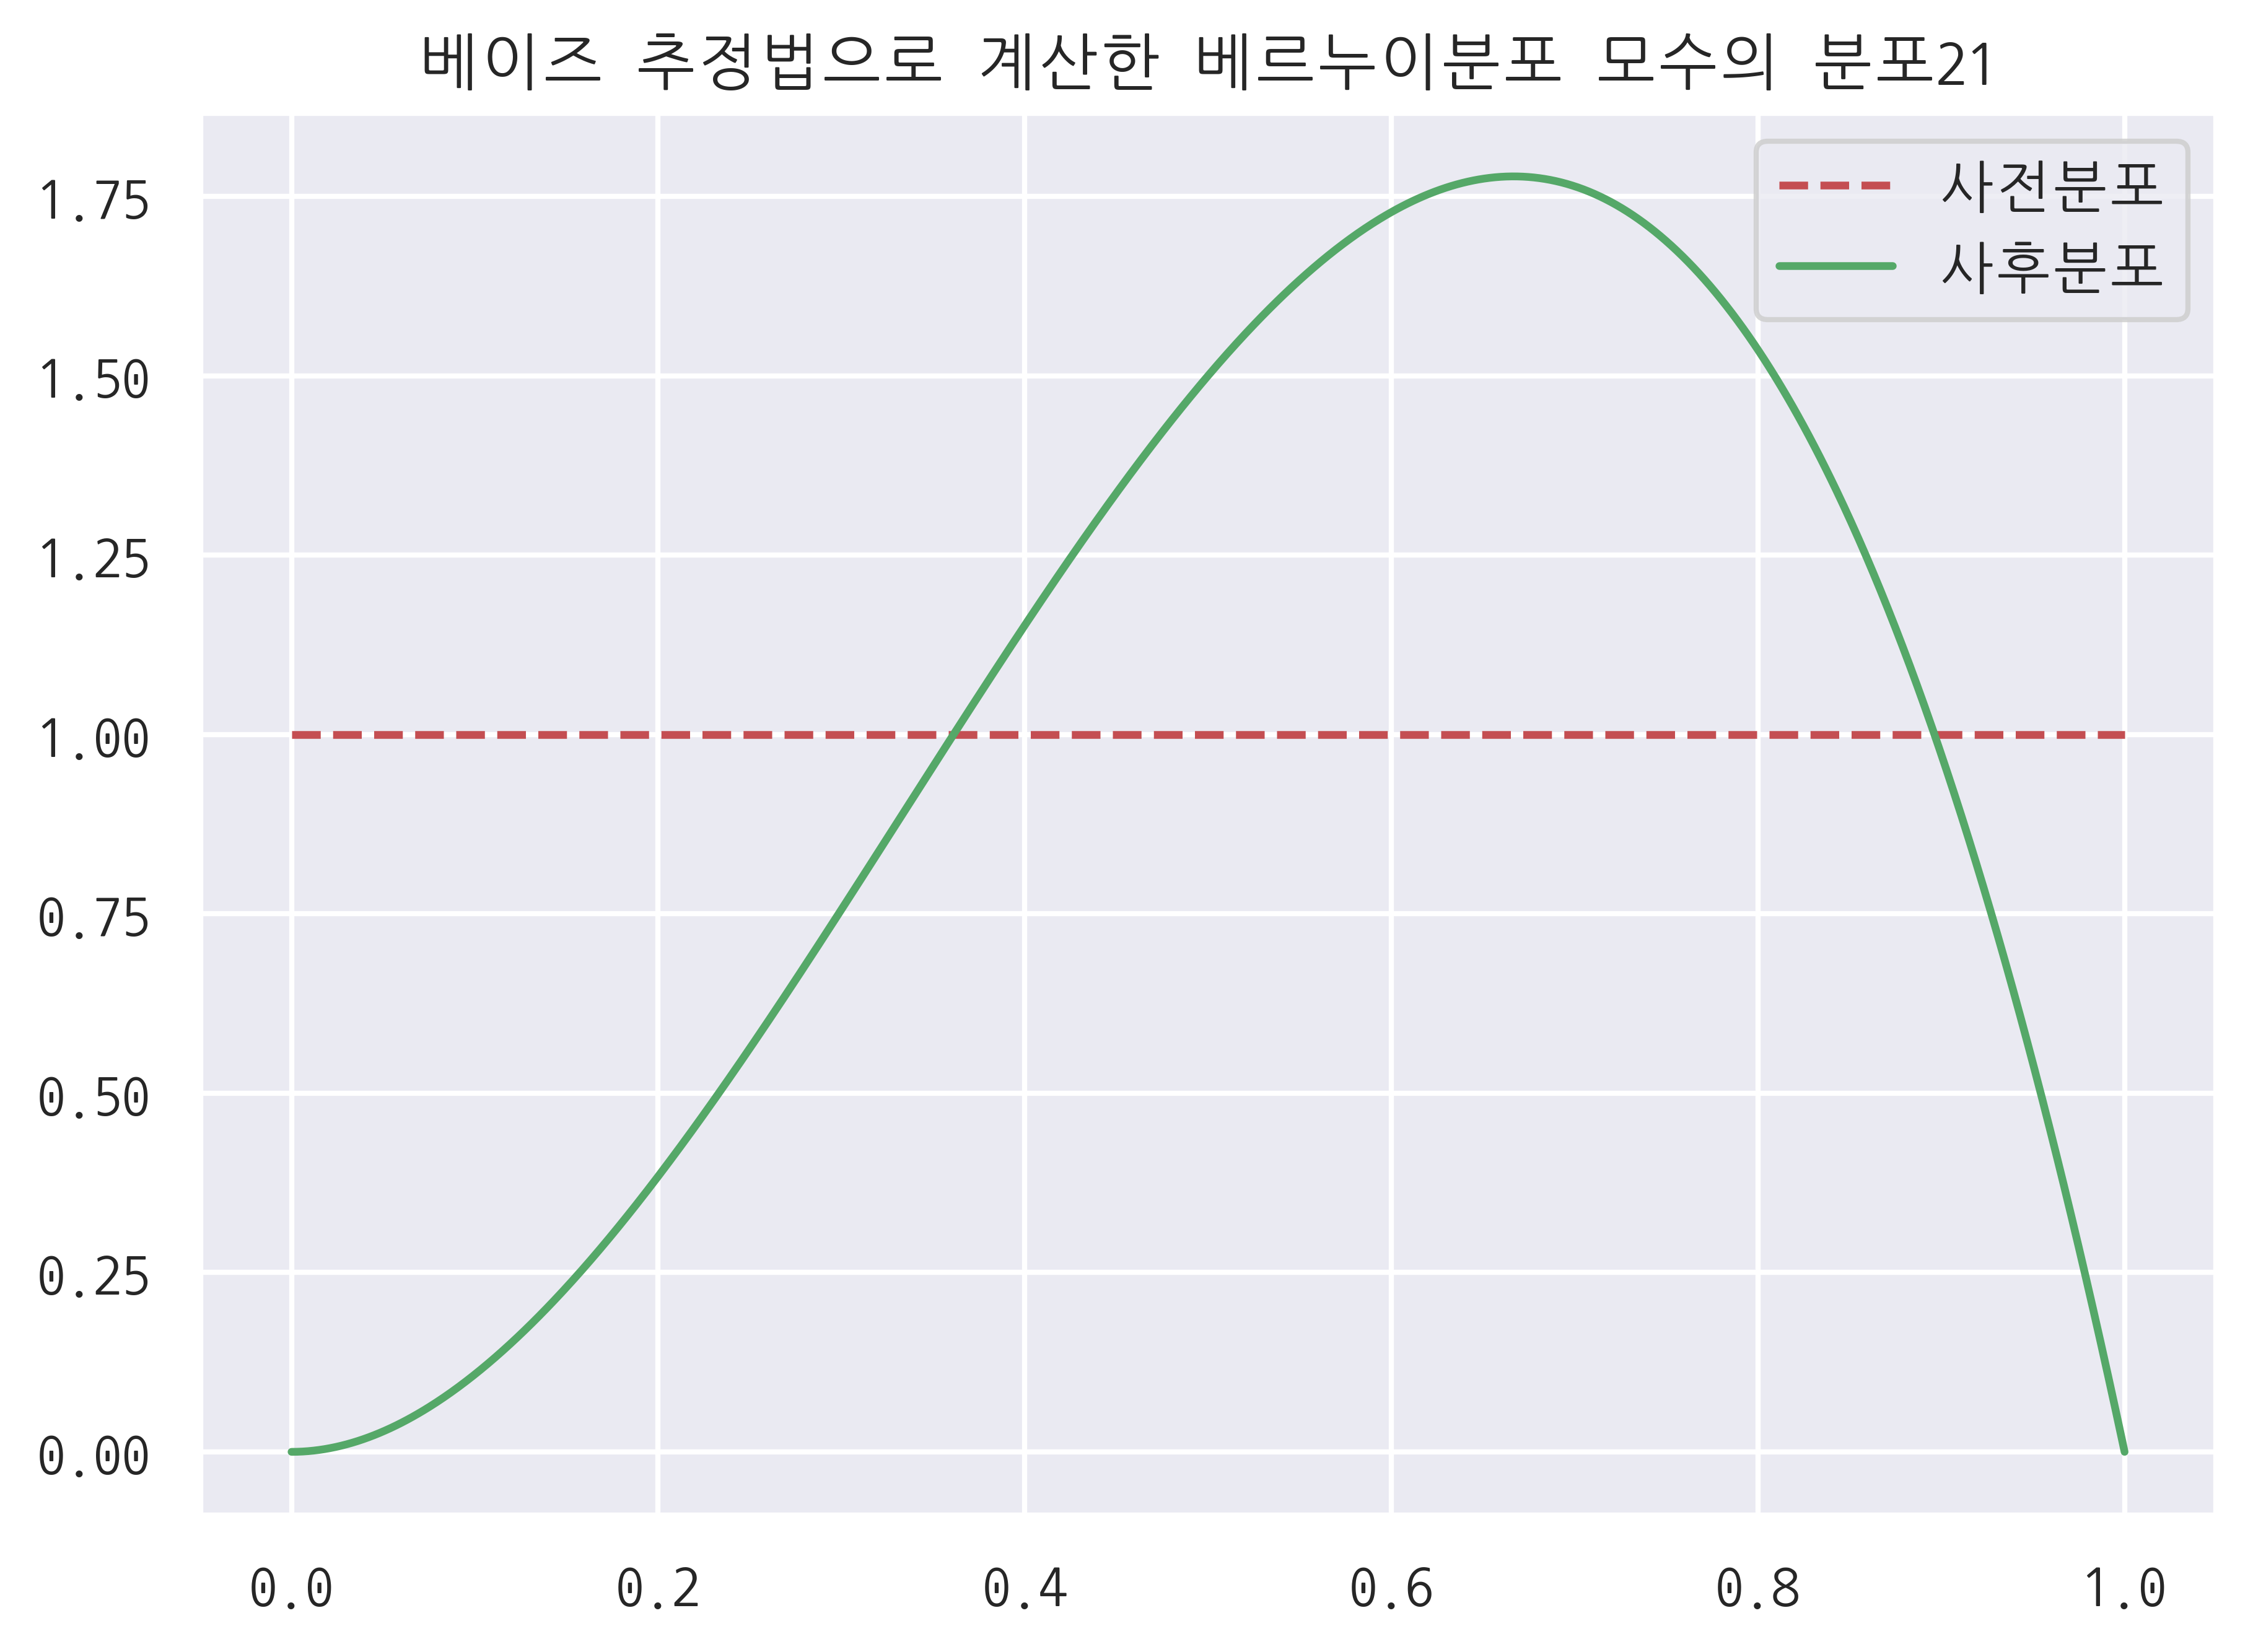

In [21]:
bernuii(2,1)

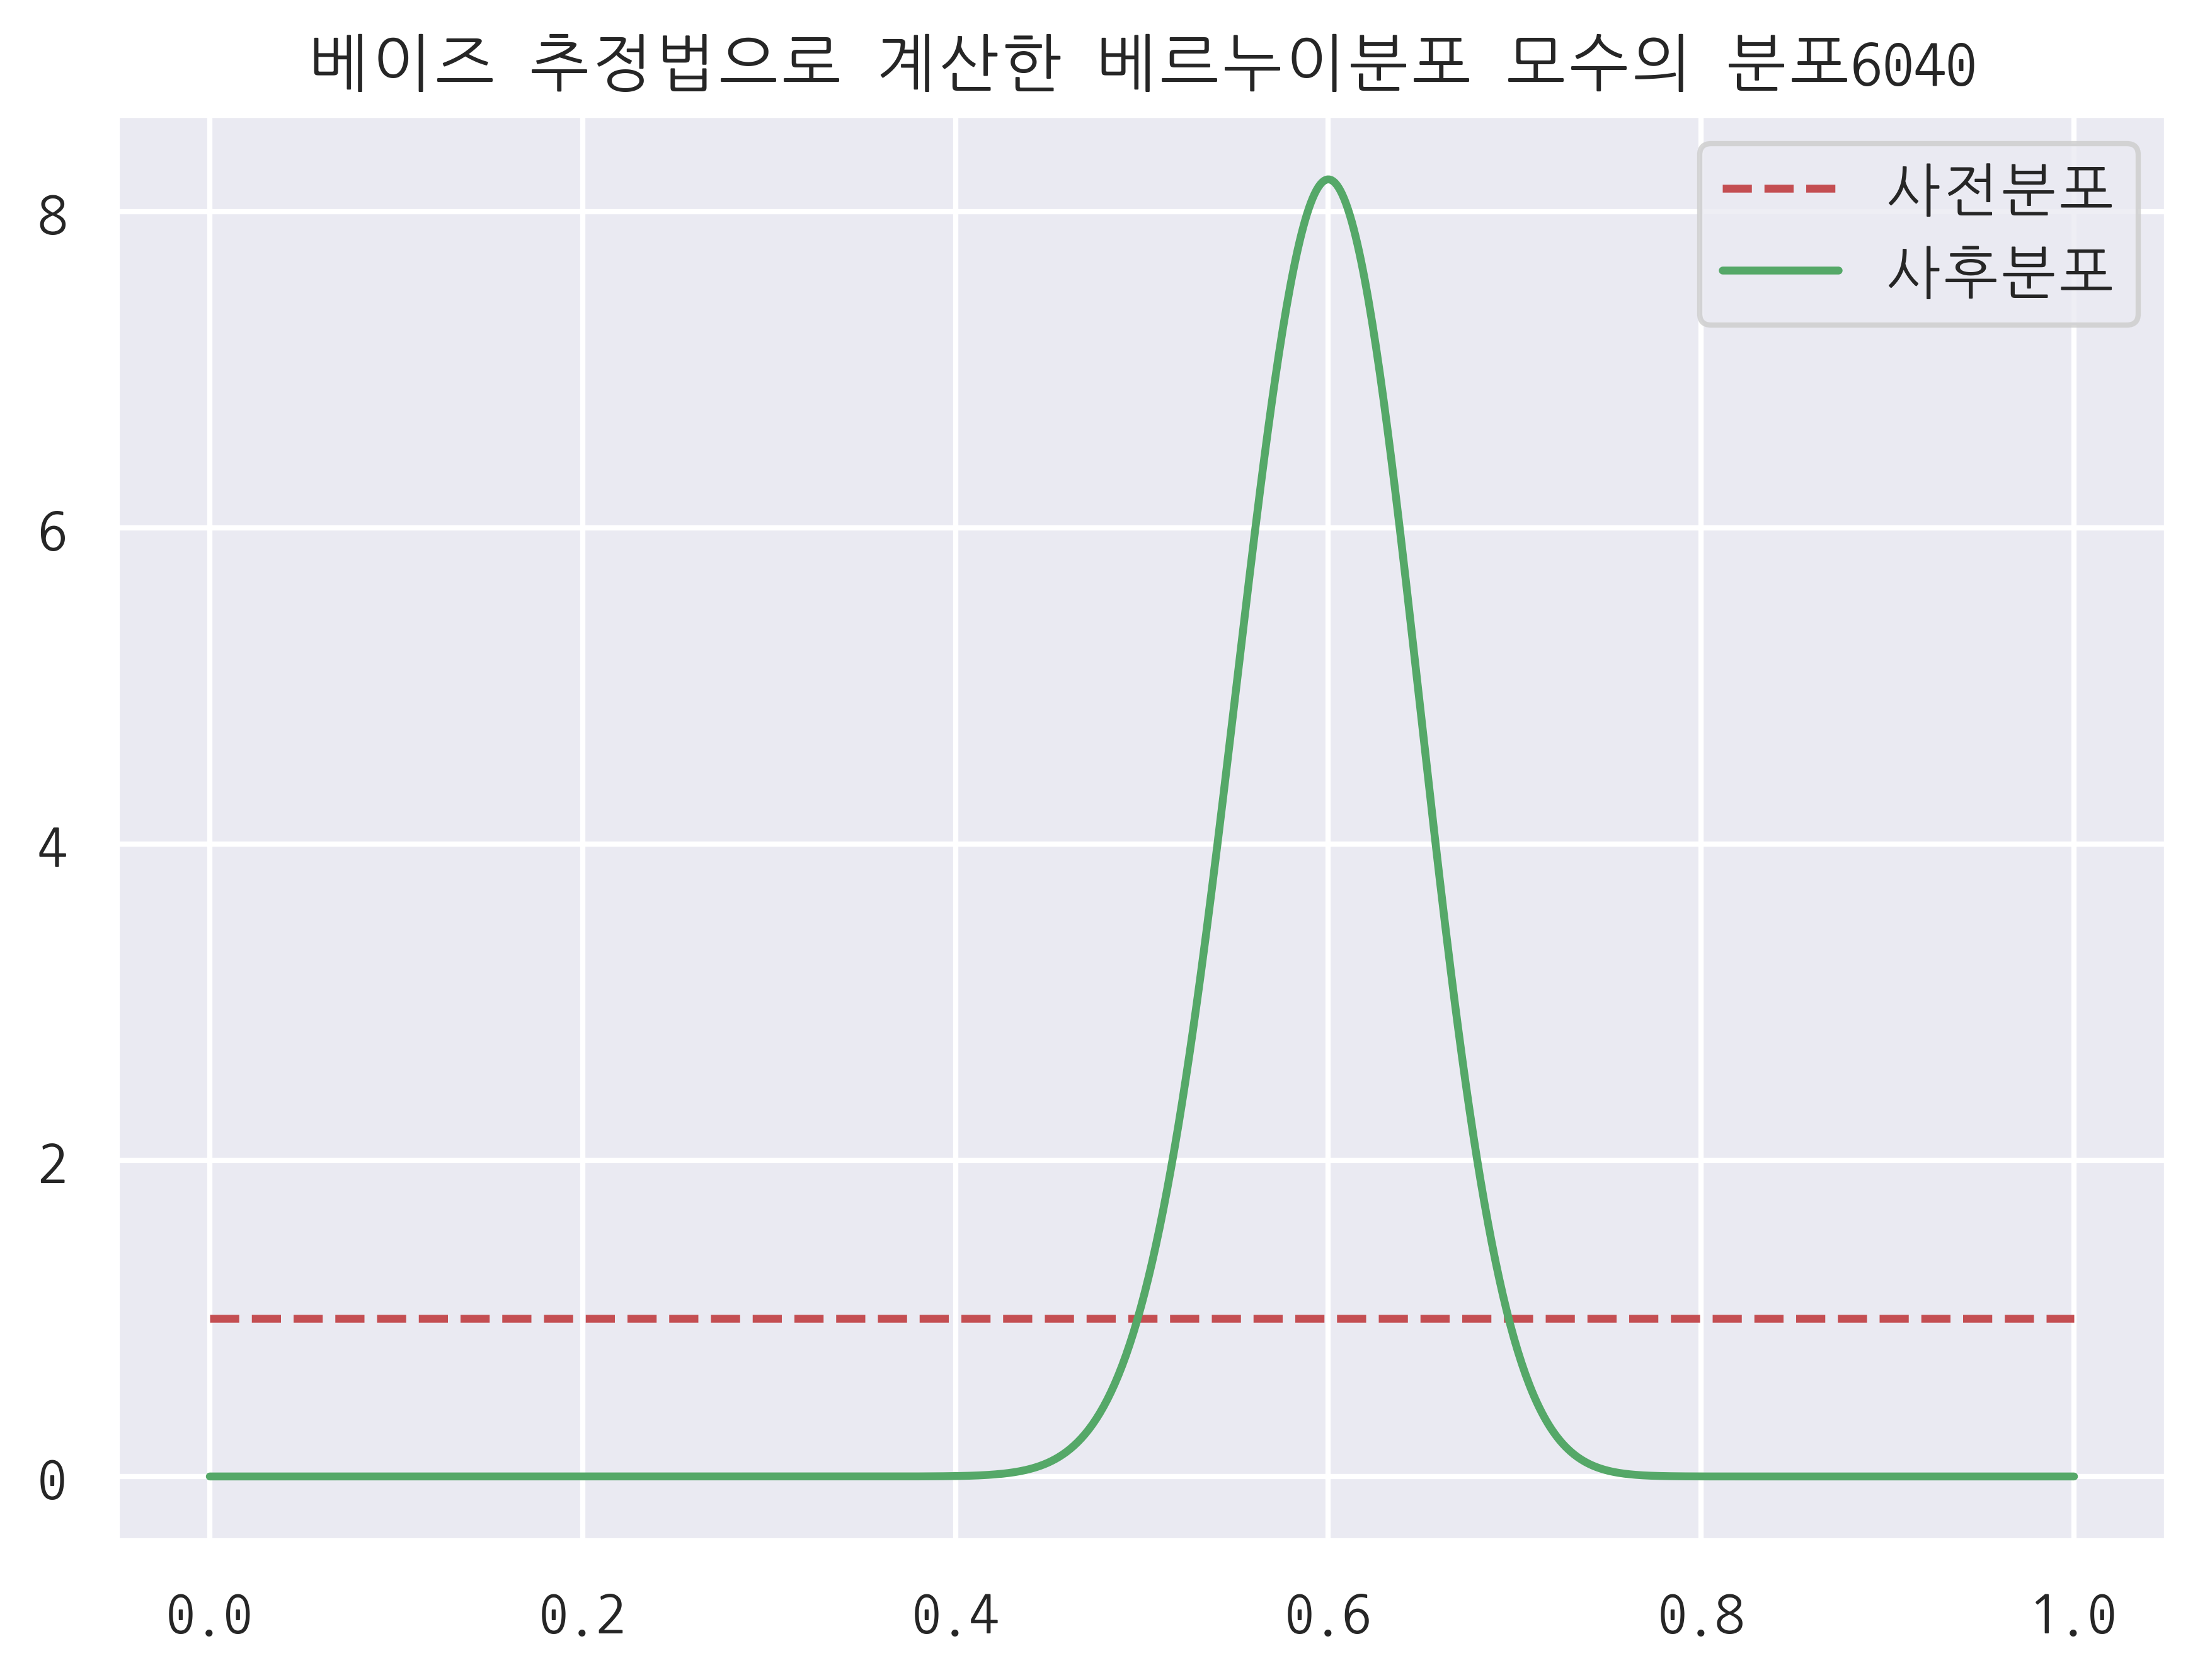

In [22]:
bernuii(60,40)

In [23]:
# 카테고리분포의 모수추정

In [24]:
# 정규분포의 기댓값 모수추정

sample mean: 5.843333333333334
sample mean: 0.6811222222222223


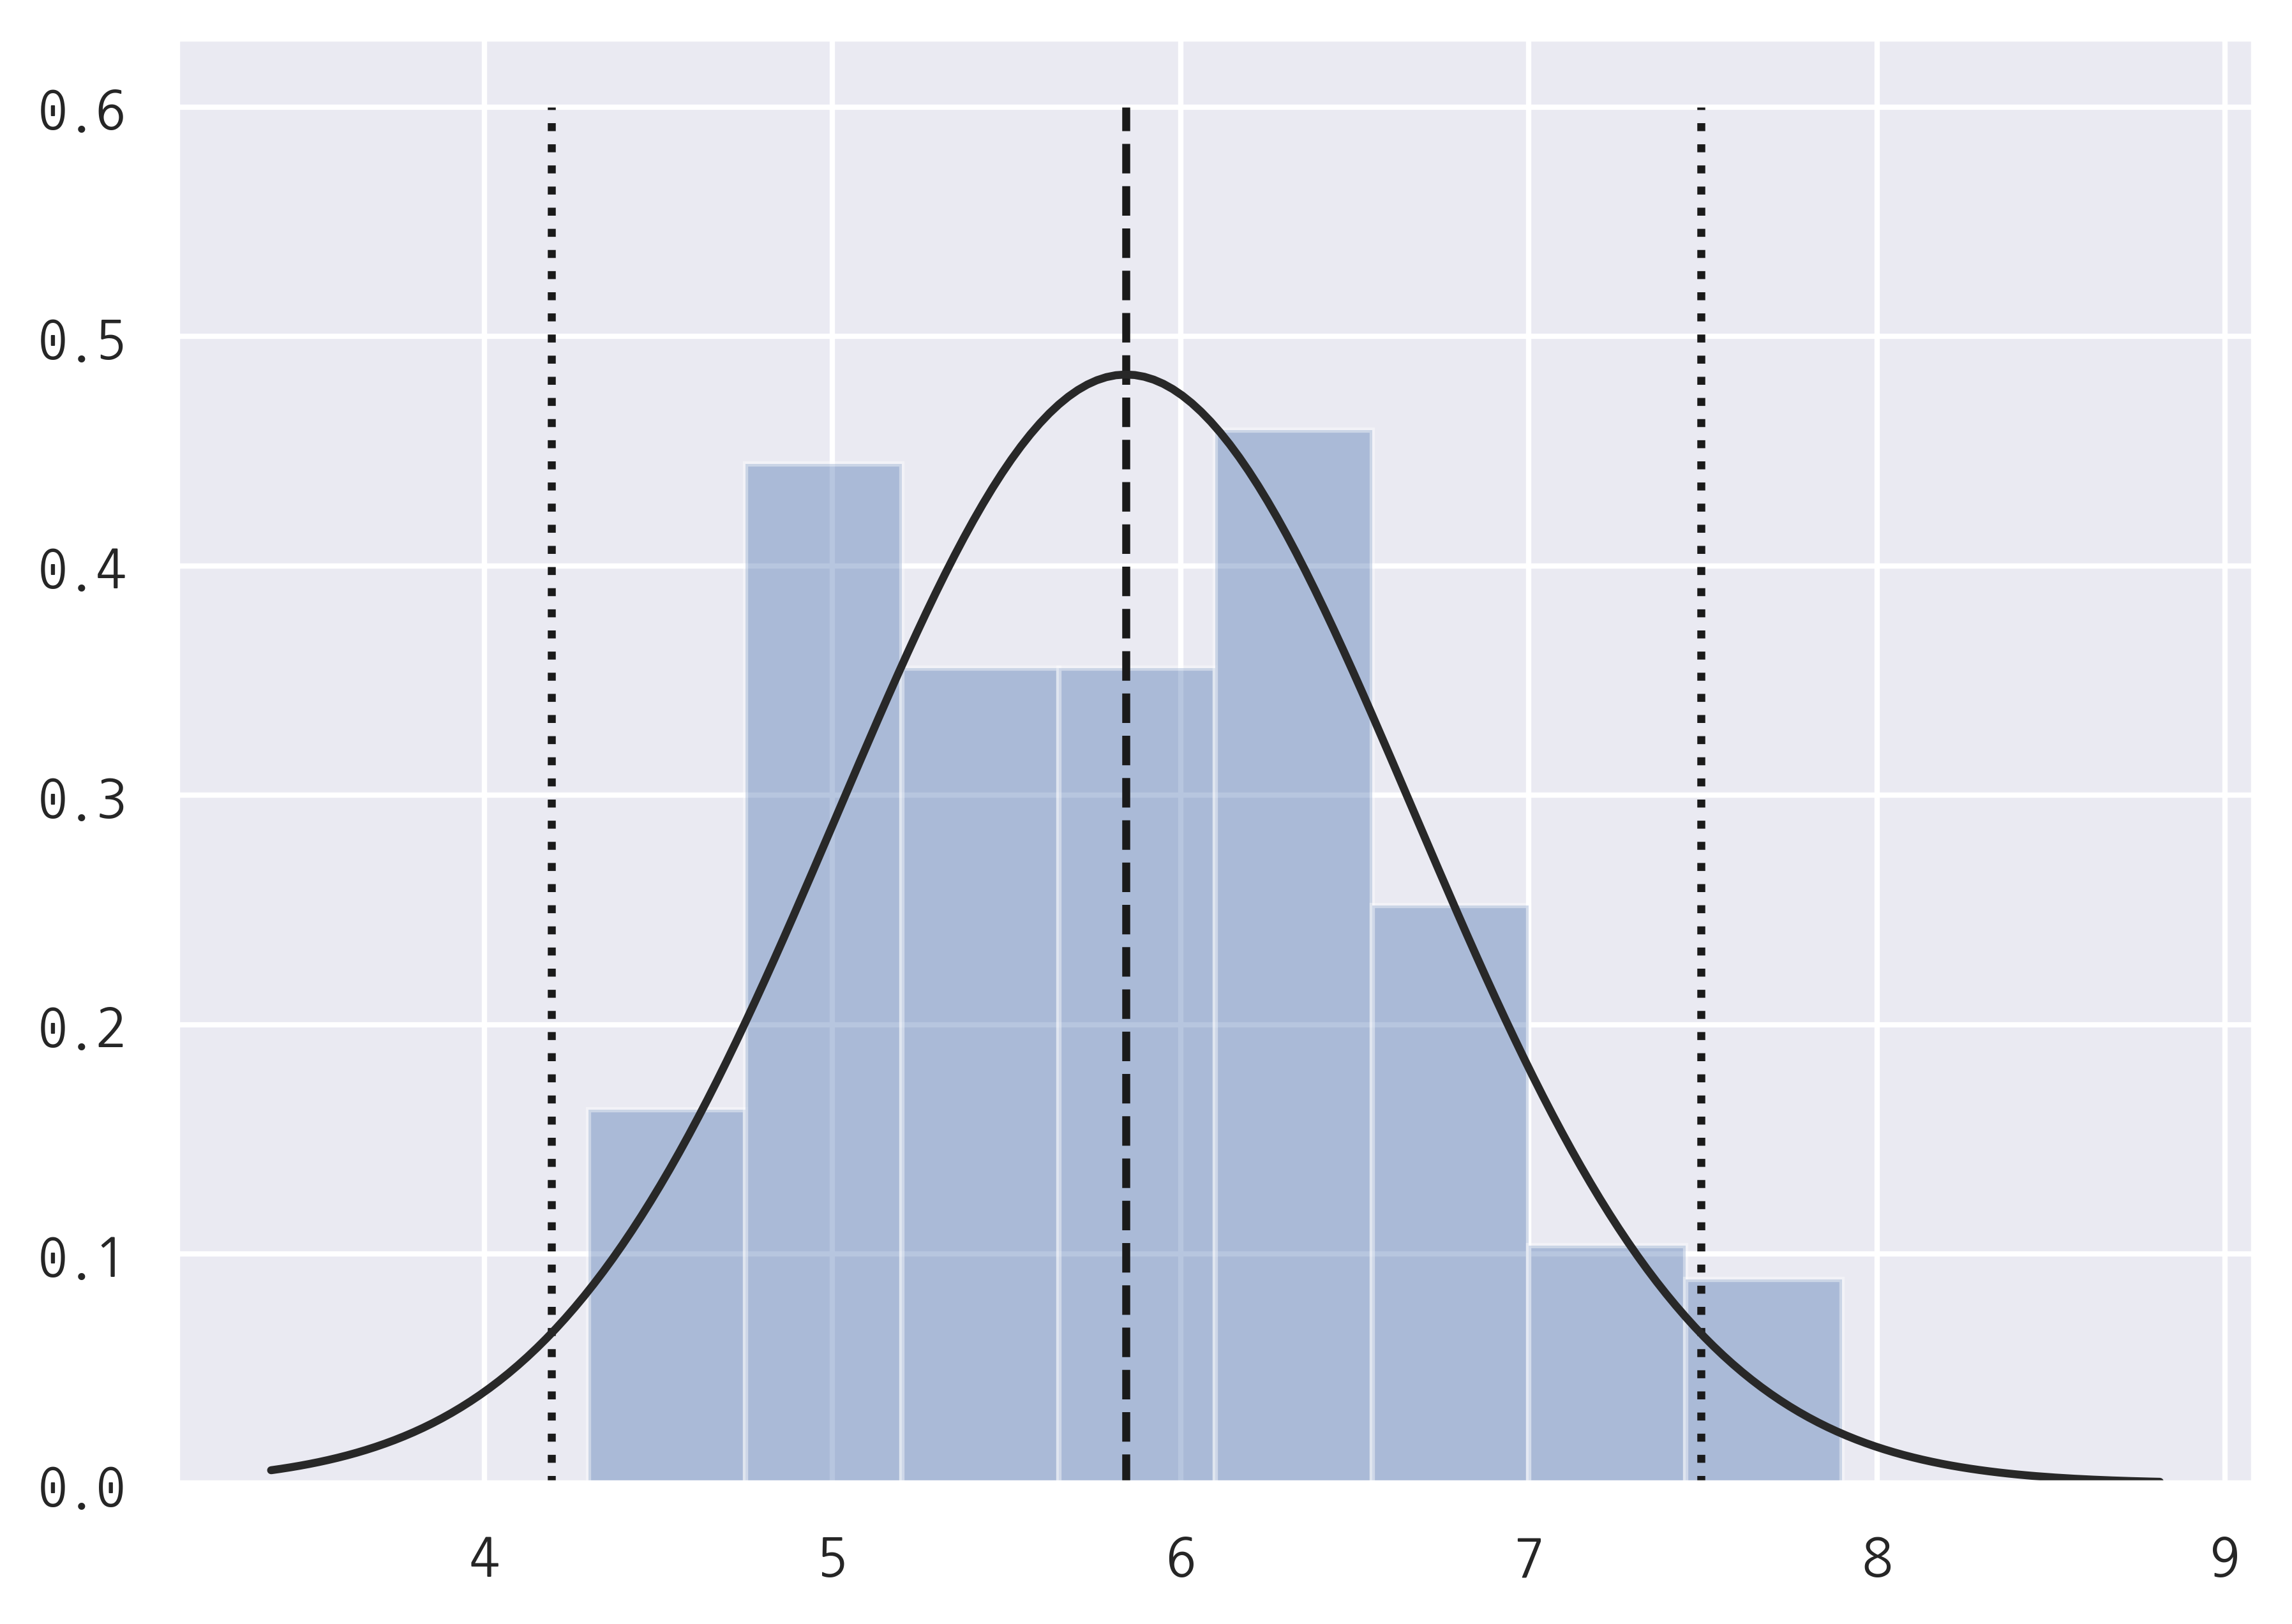

In [25]:
# 연습문제 9.3.2
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:, 0]
N = len(x)
mu = np.mean(x)
sigma2 = np.var(x)
print('sample mean:', mu)
print('sample mean:', sigma2)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.vlines(x=mu, ymin=0, ymax=0.6, ls='--')
plt.vlines(x=mu+2*np.sqrt(sigma2), ymin=0, ymax=0.6, ls=':')
plt.vlines(x=mu-2*np.sqrt(sigma2), ymin=0, ymax=0.6, ls=':')
plt.show()

In [26]:
mu0 = 1
sigma02 = 1
mu_post = sigma2 / (N*sigma02 + sigma2) * mu0 + (N*sigma02) / (N * sigma02 + sigma2) * mu
sigma2_post = 1 / (1 / sigma02 + N / sigma2)
print('post mean:', mu_post)
print('post sigma2:', sigma2_post)

post mean: 5.821440066849044
post sigma2: 0.00452028901946797


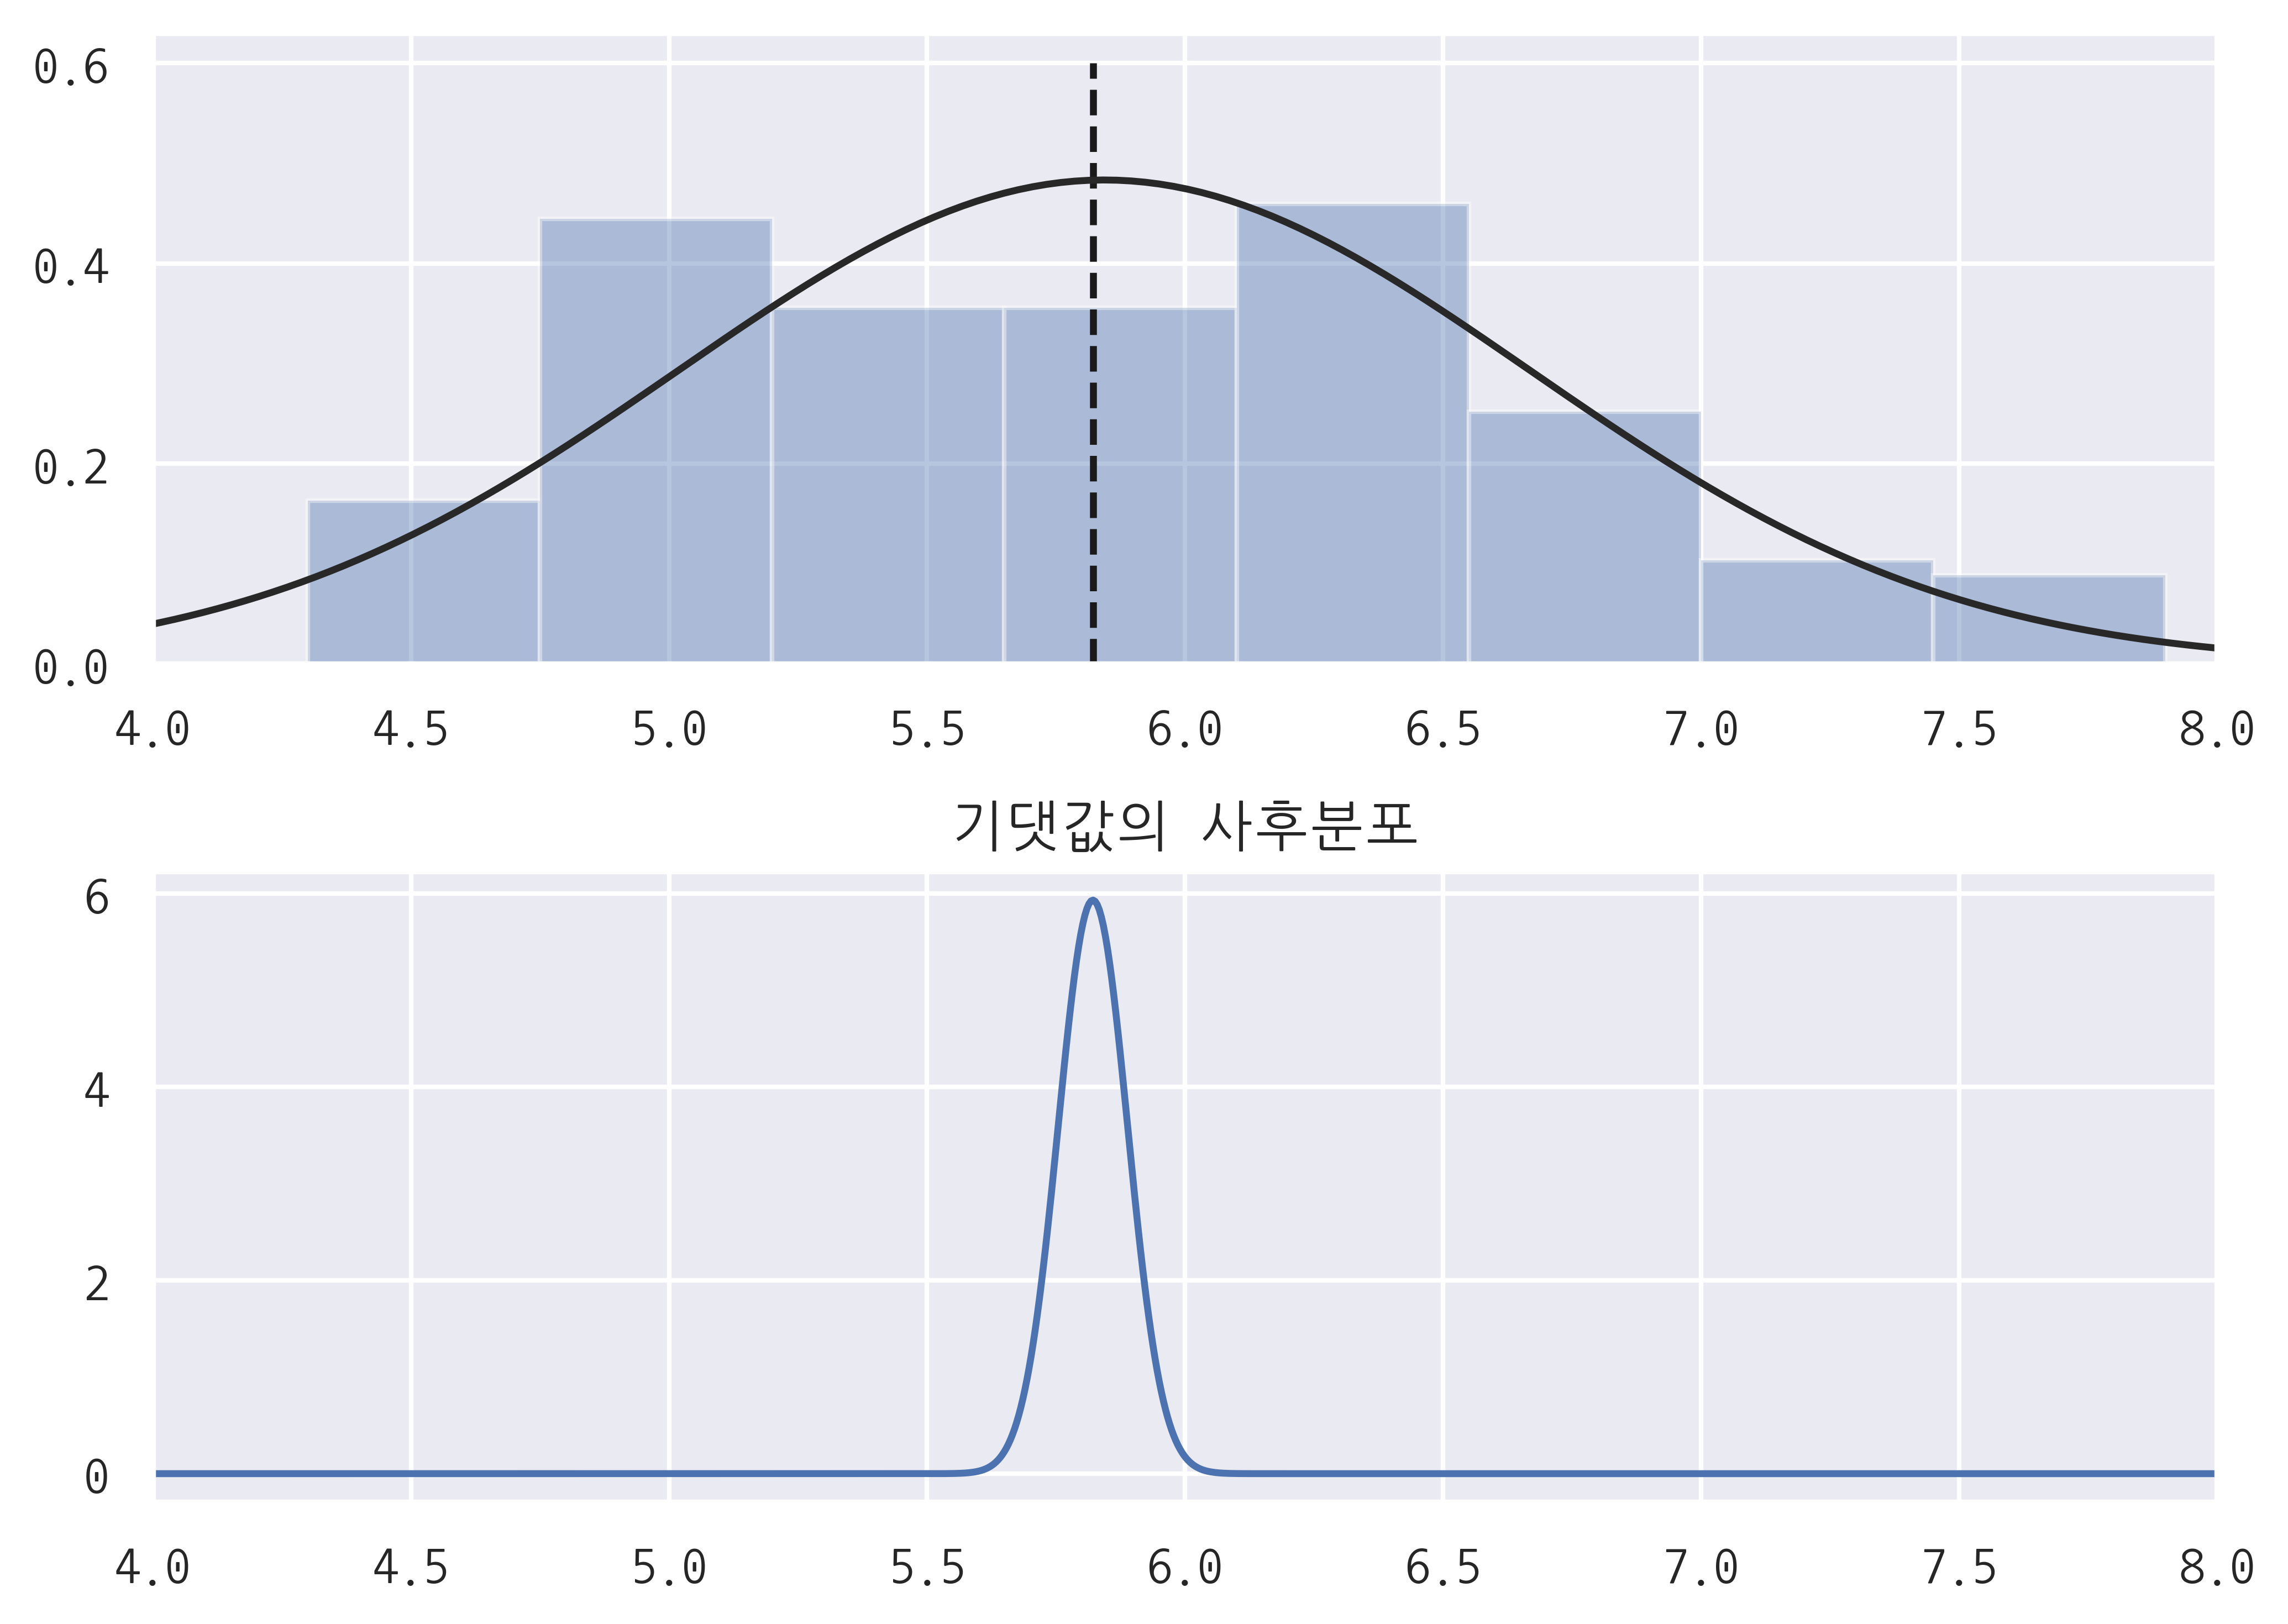

In [27]:
plt.subplot(211)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.vlines(x=mu_post, ymin=0, ymax=0.6, ls='--')
plt.xlim(4, 8)
plt.subplot(212)
xx = np.linspace(4, 8, 1000)
plt.plot(xx, sp.stats.norm(loc=mu_post, scale=np.sqrt(sigma2_post)).pdf(xx))
plt.title('기댓값의 사후분포')
plt.xlim(4, 8)
plt.tight_layout()
plt.show()

In [28]:
# 9.4 검정과 유의확률

In [29]:
# 가설과 검정

In [30]:
# 귀무가설

In [31]:
# 검정통계량

In [32]:
# 유의확률

In [33]:
# 단측검정 유의확률

In [34]:
# 유의수준과 기각역

In [35]:
# 검정 방법론

In [2]:
# 연습문제 9.4.3
# 유의확률이 41.2%이므로 유의수준보다 높고, 우측단측검정(더 좋다, 더 크다 이기때문)
# 귀무가설을 기각할수 없다.
N = 20
mu = 0.5
rv = sp.stats.binom(N,mu)
(1-rv.cdf(11-1))

0.4119014739990232

In [37]:
# 9.5 사이파이를 사용한 검정

In [38]:
# 이항검정
N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [39]:
sp.stats.binom_test(n,N) # p-valule

0.3437499999999999

In [40]:
N = 100 # 100번 시행
mu_0 = 0.5 # 모수가 0.5 (50%)
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x) # 1이 나온 횟수 (0이 나오지 않은 횟수)
n 

49

In [41]:
sp.stats.binom_test(n,N) # p-value

0.9204107626128206

In [42]:
N = 100 # 100번 시행
mu_0 = 0.35 # 모수가 0.35 (35%)
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [43]:
sp.stats.binom_test(n,N) # p-value가 0.18% 나옴 굉장히 작은 수치, mu_0은 0.5로 유의수준검정

0.00018314322488235352

In [9]:
# 연습문제 9.5.1
# 1) 2번 미만, 9번 이상
print(sp.stats.binom_test(2, n=10, p=0.5, alternative='two-sided'))
# 2)
print(sp.stats.binom_test(100, n= 1000, p=0.5, alternative='two-sided'))

0.10937500000000003
1.3403435580028222e-161


In [4]:
# 연습문제 9.5.2

In [46]:
# 연습문제 9.5.3

In [47]:
# 카이제곱 검정
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [48]:
sp.stats.chisquare(n) # statistic =  통계량, pvalue = 유의확률

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [49]:
# 카이제곱 검정
N = 100
K = 4
mu_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11], dtype=int64)

In [50]:
sp.stats.chisquare(n) # statistic =  통계량, pvalue = 유의확률

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

In [51]:
# 연습문제 9.5.4
sp.stats.chisquare([0,0,0,0,0,5]) # statistic =  통계량, pvalue = 유의확률

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

In [52]:
# 카이제곱 독립검정

In [53]:
obs = np.array([[5,15],[10,20]]) # 두개의 케이스를 적어넣음
sp.stats.chi2_contingency(obs) 
# 2번째 값이 유의확률 0.75 -> 상관관계가 없다.(귀무가설) -> 귀무가설을 기각하지 못함

(0.0992063492063492, 0.7527841326498471, 1, array([[ 6., 14.],
        [ 9., 21.]]))

In [54]:
obs = np.array([[4,16,20],[23,18,19]]) # 두개의 케이스를 적어넣음
sp.stats.chi2_contingency(obs) 
# 2번째 값이 유의확률 0.007(0.7%) -> 상관관계가 있다.(귀무가설) -> 귀무가설을 기각함

(9.910060890453046, 0.00704786570249751, 2, array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

In [55]:
# 단일표본 z검정

In [56]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [57]:
def ztest_1samp(x, sigma2 = 1, mu = 0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2* sp.stats.norm().sf(np.abs(z))

ztest_1samp(x) # 유의확률 0.019(1.9%)로 기각함. 근데 실제 mu_0은 0임, 따라서 1종오류

(2.3338341854824276, 0.019604406021683538)

In [58]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
ztest_1samp(x) # 1종오류를 없애기 위해 데이터 갯수를 늘려서 확인, 유의확률 0.54(54%)

(0.5980801553448499, 0.5497864508624168)

In [59]:
# 단이표본 t검정

In [60]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x,popmean=0) # 유의수준 0.047(4.7%), 1종오류 데이터가 몇개없어서

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

In [61]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x,popmean=0) # 유의수준 0.55(55.6%), 기각 못함

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

In [62]:
# 독립표본 t검정
N_1 = 10
mu_1 = 0
sigma_1 = 1
N_2 = 10
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
np.mean(x1), np.mean(x2)

(0.7380231707288347, 0.9006460151624349)

In [63]:
sp.stats.ttest_ind(x1, x2, equal_var=False) # 유의확률 0.68(68%) 2종오류, 귀무가설이 틀린데 맞다고 나온것

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)

In [64]:
# 독립표본 t검정
N_1 = 50
mu_1 = 0
sigma_1 = 1
N_2 = 100
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
np.mean(x1), np.mean(x2)

(0.14055927231309787, 0.6177957994523524)

In [65]:
sp.stats.ttest_ind(x1, x2, equal_var=True) # 유의확률 0.0081(0.8%), 데이터 갯수가 많아져서 2종오류가 사라짐

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.008133970915722658)

In [66]:
# 연습문제 9.5.6
x1 = [80,75,85,50,60,75,45,70,90,95,85,80]
x2 = [80,85,70,80,35,55,80]

In [67]:
# 귀무가설 : 1반과 2반의 실력은 같다.
sp.stats.ttest_ind(x1, x2, equal_var=True) # 유의확률이 54% 이므로, 기각안됨 

Ttest_indResult(statistic=0.623010926550264, pvalue=0.5415458608473267)

In [68]:
sp.stats.ttest_ind(x1, x2, equal_var=False) # 유의확률이 56% 이므로, 기각안됨

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

In [69]:
# 대응표본 t검정
N = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
sp.stats.ttest_rel(x1, x2) # 유의확률 0.00479(0.48%)로 귀무가설을 기각한다

Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)

In [70]:
# 등분산 검정
# 귀무가설 : 두 표본집합이 서로 같은 분산을 가지고 있다
# 같은 표본이라도, 사용하는 등분산검정 방식에 따라 기각이 안될수도있다
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
x1.std(), x2.std()

(1.0078822447165796, 1.2416003969261071)

In [71]:
sp.stats.bartlett(x1, x2) # 유의수준 0.039(3.9%) 유의영역이 1%면 기각안됨 

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [72]:
sp.stats.fligner(x1, x2) # 유의수준 0.0071(0.7%) 기각됨 

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [73]:
sp.stats.levene(x1, x2) # 유의수준 0.0061(0.6%) 기각됨 

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

In [74]:
# 정규성 검정
# 두개의 분포가 같다 (둘다정규분포일것이다.)
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5,1.5).rvs(N2)
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23, pvalue=0.055507233643215415)